# Solar Power Generation Forecasting 



## importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras import regularizers
#from keras.optimizers import  RMSprop, Adam, SGD
from keras.optimizers import  rmsprop_v2,adam_v2
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()  # needs to load ps1_cln.csv

Saving ps1_cln.csv to ps1_cln.csv


## importing dataset

In [33]:

dts = pd.read_csv('ps1_cln.csv')
dts.head(3)

,measurementtimestamp,Irradiance Global (W/m^2),WP_SF_MVPS1.PM1
0,2021-01-01T08:45:00.000Z,576,"2,114.72"
1,2021-01-01T09:00:00.000Z,640,"2,108.79"
2,2021-01-01T09:15:00.000Z,728,"2,210.22"


In [34]:
X = dts.iloc[:, [1]].values
y = dts.iloc[:, -1].values
 # Converting into integers 
y=np.array(y)
y=y.astype(int)
 #---------------------------


In [49]:
X
X.shape

(35025, 1)

In [50]:
y
y.shape

(35025,)

## Splitting Training and Test sets

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print("Train Shape: {} {} \nTest Shape: {} {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Train Shape: (28020,) (28020,) 
Test Shape: (7005,) (7005,)


In [10]:
print(y_train[0:10].ravel())

[   0    0    0    0  440    0    0 1921    0    0]


## Creating Random forest


In [15]:
X_train.reshape(-1,1)

array([[ 0],
       [ 0],
       [ 0],
       ...,
       [ 0],
       [ 0],
       [21]])

In [23]:
X_train= X_train.reshape(-1,1)
X_test= X_test.reshape(-1,1)

### defining accuracy function

In [24]:
 from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=0)

In [25]:

model.score(X_test, y_test)

0.847118744097535

array([1110.70920094])

In [26]:
y_pred = model.predict(X_test)
y_pred1 = y_pred.reshape(len(y_pred), 1)
y_pred1

array([[5.53746690e-03],
       [5.53746690e-03],
       [5.53746690e-03],
       ...,
       [1.50033488e+03],
       [5.53746690e-03],
       [5.07808941e+02]])

In [27]:


y_test1 = y_test.reshape(len(y_test), 1)
a = np.concatenate((y_pred1, y_test1), 1)
am = pd.DataFrame(data  = a, columns = ('Predicted Value', 'Real Value'))
pd.options.display.float_format = "{:,.2f}".format
am[1:10]

,Predicted Value,Real Value
1,0.01,0.00
2,0.01,0.00
3,0.01,0.00
4,0.01,0.00
5,2.01,5.00
6,0.01,0.00
7,"1,131.50",794.00
8,0.01,0.00
9,370.13,463.00


In [28]:
len(y_pred)


7005

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.847118744097535

In [30]:
y_test.shape
#y_pred.shape
y_test
y_pred3=y_pred.astype(int)
y_pred3

array([   0,    0,    0, ..., 1500,    0,  507])

In [ ]:
y_pred1

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
cm

array([[3500,    0,   12, ...,    0,    0,    0],
       [   2,    0,    0, ...,    0,    0,    0],
       [   4,    0,    3, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0]])

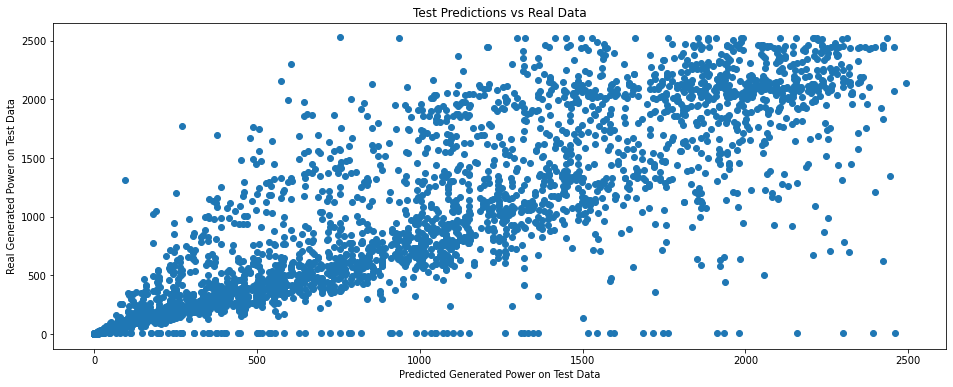

In [32]:
plt.figure(figsize=(16,6))
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Generated Power on Test Data')
plt.ylabel('Real Generated Power on Test Data')
plt.title('Test Predictions vs Real Data')
#plt.scatter(y_test_orig, sc_X.inverse_transform(X_test)[:,2], color='green')
plt.show()

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import pickle
with open('model_bk1','wb') as file:
    pickle.dump(model,file)